In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns; sns.set(style="ticks", color_codes=True)
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.impute import SimpleImputer


import os
print(os.listdir("Housing-Prices/data"))

['data_description.txt', 'sample_submission.csv', 'test.csv', 'train.csv']


In [18]:
#import data
df = pd.read_csv("Housing-Prices/data/train.csv", sep=',', header=0)
test = pd.read_csv("Housing-Prices/data/test.csv",sep=',', header=0)

#ID isn't useful
df.drop('Id', axis=1, inplace=True)
test.drop('Id', axis=1, inplace=True)

example_submision = pd.read_csv("Housing-Prices/data/sample_submission.csv",sep=',', header=0)
example_submision.head()


,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [19]:
df.shape

(1460, 80)

In [20]:
test.shape

(1459, 79)

In [21]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [22]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [24]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

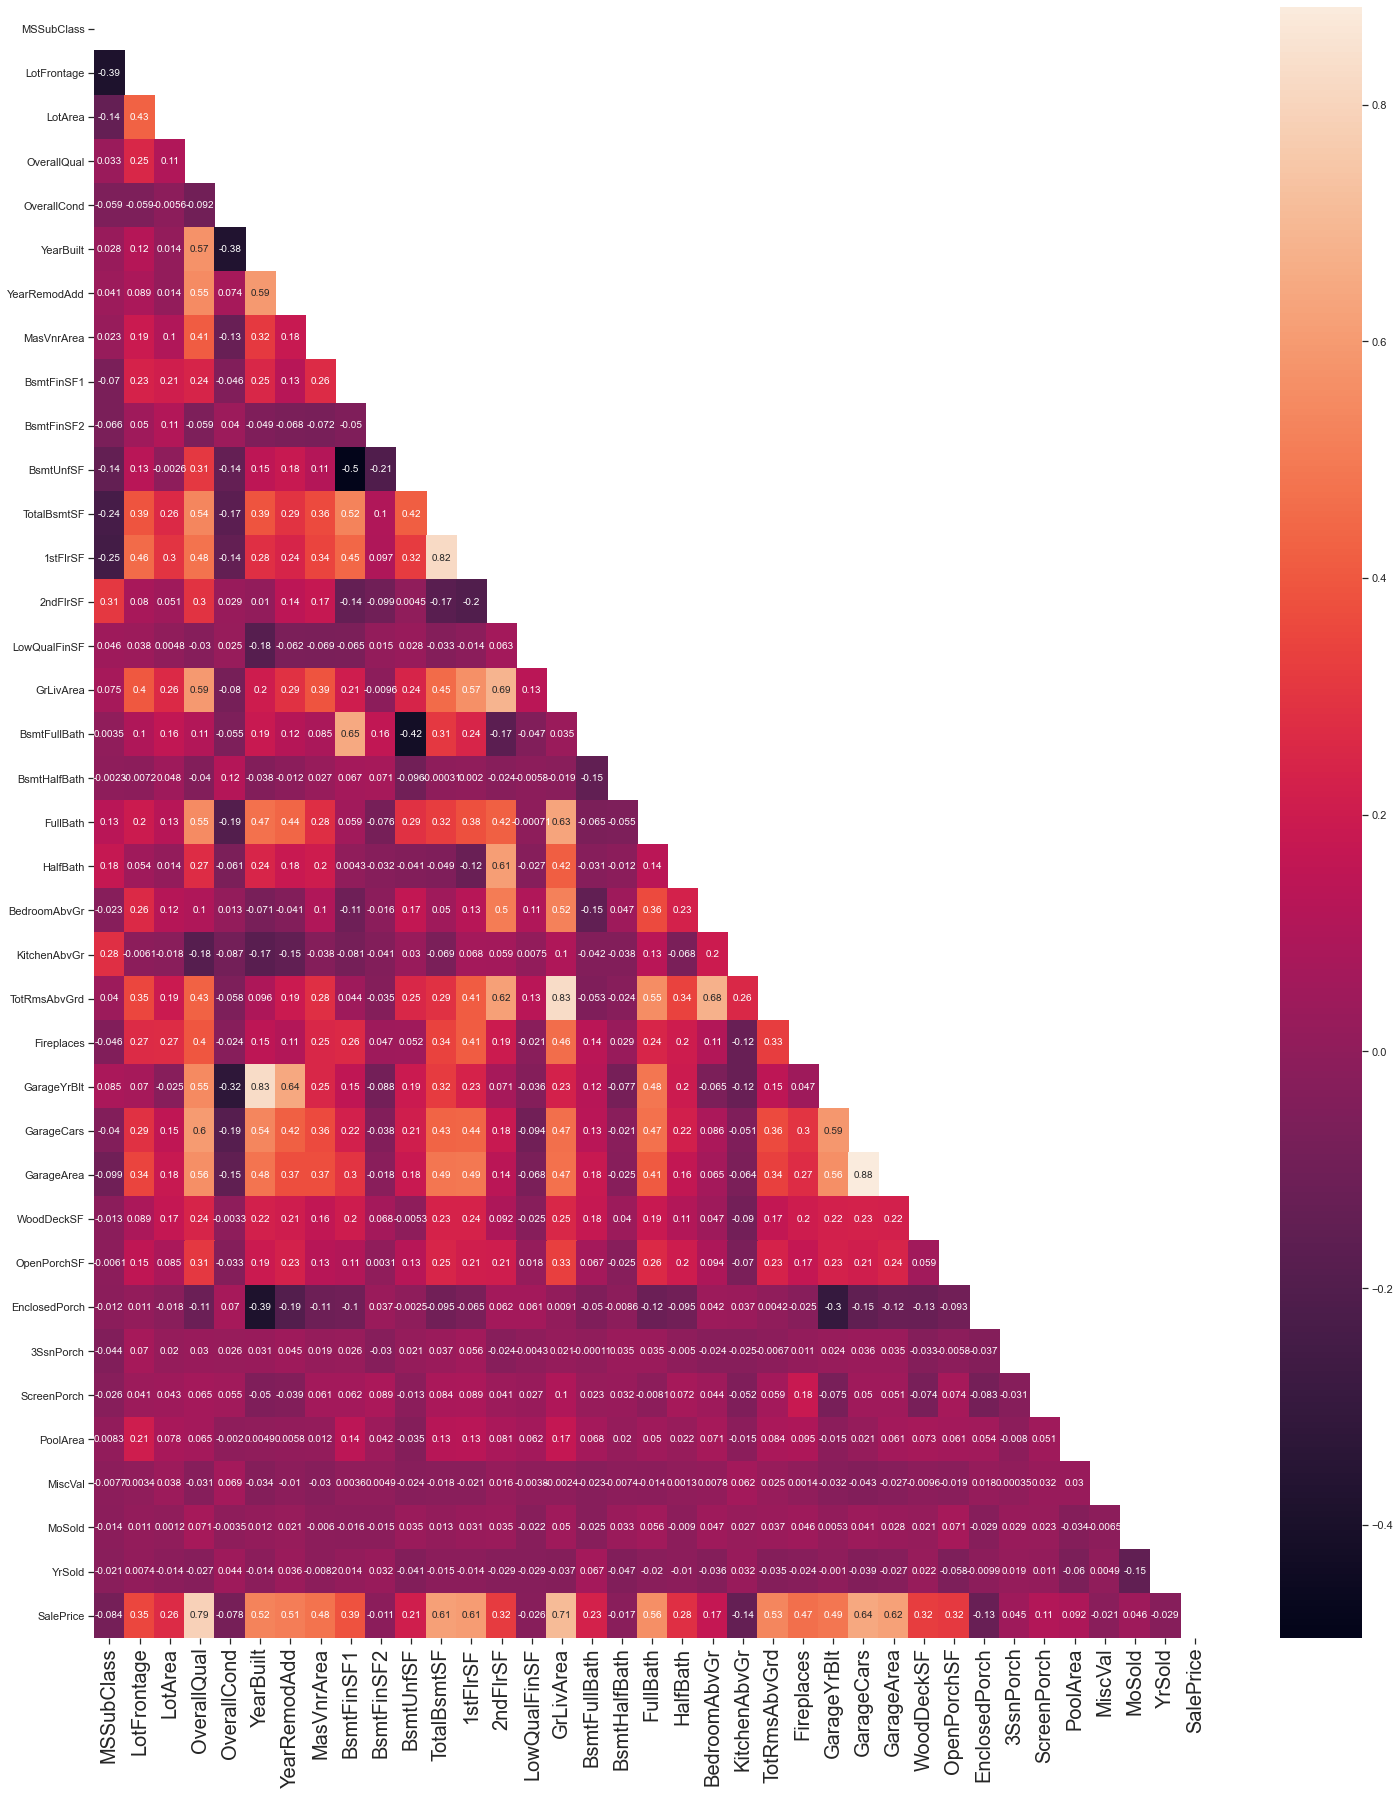

In [31]:
plt.figure(figsize=(25,30))
plt.xticks(fontsize=20)
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr(), mask=mask, annot=True)

In [51]:
'''
Look to find what is correlated with Saleprice and then trying to find if there are correlations between other variables 

OverallQual - GarageYrBlt, Garage Cars / Garage Area, Fullbath, GrLivArea, 1stFlrSF, TotalBsmtSF, YearBuilt, YearRemodAdd
Yearbuilt - GarageYrBlt, GarageCars, GarageArea (Makes Sense, the newer it is, the more likely it is to have larger things)
YearRemodAdd - GarageYrBlt
MasVnrArea - Nothing above.5 but Garage,bathroom stuff
BsmtFinSF1 - 1stFloorSF, TotalBSMTSF - Bigger the top floor, the bigger the 
TotalBsmtSF,- GarageArea, GarageCars
GrLivArea - TotRmsAbvGrd(high)
FullBath,
TotRmsAbvGrd,
Fireplaces, 
GarageYrBlt
GarageCars
GarageArea

'''
corr_matrix = df.corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)

sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                  .stack()
                  .sort_values(ascending=False))

corr = pd.DataFrame(columns=['var1', 'var2', 'Correlation'])
for index, value in sol.items():
    corr = corr.append({'var1':index[0],'var2':index[1],'Correlation':value}, ignore_index=True)

print(corr[corr.Correlation>.5])    

            var1          var2  Correlation
0     GarageCars    GarageArea     0.882475
1      YearBuilt   GarageYrBlt     0.825667
2      GrLivArea  TotRmsAbvGrd     0.825489
3    TotalBsmtSF      1stFlrSF     0.819530
4    OverallQual     SalePrice     0.790982
5      GrLivArea     SalePrice     0.708624
6       2ndFlrSF     GrLivArea     0.687501
7   BedroomAbvGr  TotRmsAbvGrd     0.676620
8     BsmtFinSF1  BsmtFullBath     0.649212
9   YearRemodAdd   GarageYrBlt     0.642277
10    GarageCars     SalePrice     0.640409
11     GrLivArea      FullBath     0.630012
12    GarageArea     SalePrice     0.623431
13      2ndFlrSF  TotRmsAbvGrd     0.616423
14   TotalBsmtSF     SalePrice     0.613581
15      2ndFlrSF      HalfBath     0.609707
16      1stFlrSF     SalePrice     0.605852
17   OverallQual    GarageCars     0.600671
18   OverallQual     GrLivArea     0.593007
19     YearBuilt  YearRemodAdd     0.592855
20   GarageYrBlt    GarageCars     0.588920
21   OverallQual     YearBuilt  

In [43]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df, 3))

Top Absolute Correlations


KeyError: ('BsmtUnfSF', 'Condition2')